In [1]:
import pandas as pd
import numpy as np 
import random
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [2]:
fpath = os.getcwd()
file_accident = os.path.join(fpath,"2018/accident.csv")
file_person   = os.path.join(fpath,"2018/person.csv")
data_accident2018 = pd.read_csv(file_accident)
data_person2018   = pd.read_csv(file_person)

In [3]:
data_person2018 = data_person2018.drop(['COUNTY','VEH_NO','STR_VEH','FUNC_SYS','HARM_EV','SCH_BUS','IMPACT1','FIRE_EXP',
       'STATE','BODY_TYP','TOW_VEH','SEAT_POS','REST_MIS','AIR_BAG','HOUR','SPEC_USE','EMER_USE','MINUTE','MAKE',
       'MAK_MOD','ROLLOVER','EJECTION','EJ_PATH','EXTRICAT','DEATH_YR','DEATH_HR','DEATH_MN','DEATH_TM','LAG_HRS','PER_TYP',
       'LAG_MINS','P_SF1','P_SF2','P_SF3','LOCATION', 'HOSPITAL','VE_FORMS', 'PER_NO', 'DAY', 'MONTH',
       'ALC_STATUS', 'ATST_TYP','DSTATUS', 'DOA', 'DEATH_DA', 'DEATH_MO', 'WORK_INJ','RUR_URB',
       'HISPANIC', 'RACE'], axis=1)
data_accident2018 = data_accident2018.drop(['STATE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH','YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2', 'WRK_ZONE', 'REL_ROAD', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3'], axis=1)

In [4]:
df = pd.merge(data_person2018,data_accident2018, on='ST_CASE')
df.columns

Index(['ST_CASE', 'MAN_COLL', 'MOD_YEAR', 'AGE', 'SEX', 'INJ_SEV', 'REST_USE',
       'DRINKING', 'ALC_DET', 'ALC_RES', 'DRUGS', 'DRUG_DET', 'TYP_INT',
       'LGT_COND', 'FATALS', 'DRUNK_DR'],
      dtype='object')

In [5]:
df['CAR_AGE'] = 2018 - df['MOD_YEAR']
df['CAR_AGE'] = np.where((df['CAR_AGE'] < 0), -1, df['CAR_AGE'])
df = df[df['CAR_AGE'] > 0] 

In [6]:
df = df.drop(['ST_CASE','MOD_YEAR','ALC_DET','DRUG_DET','DRINKING'],axis=1)
df.columns

Index(['MAN_COLL', 'AGE', 'SEX', 'INJ_SEV', 'REST_USE', 'ALC_RES', 'DRUGS',
       'TYP_INT', 'LGT_COND', 'FATALS', 'DRUNK_DR', 'CAR_AGE'],
      dtype='object')

0     29512
6     18320
2     10886
1      8295
7      1816
8      1495
11      289
98      115
9       115
99       60
10        1
Name: MAN_COLL, dtype: int64

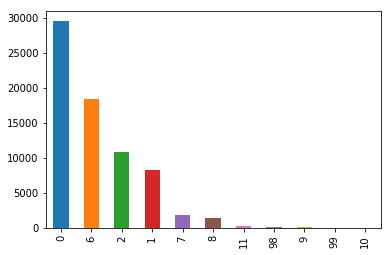

In [7]:
df.MAN_COLL.value_counts().plot(kind='bar')
df.MAN_COLL.value_counts()

In [8]:
replacements = {'MAN_COLL': { 2 : 1 }}
df.replace(replacements, regex=True, inplace=True)

replacements1 = {'MAN_COLL': {8 : 7 }}
df.replace(replacements1, regex=True, inplace=True)

replacements2 = {'MAN_COLL': {10 : 9 }}
df.replace(replacements2, regex=True, inplace=True)

replacements3 = {'MAN_COLL': {98 : 11 }}
df.replace(replacements3, regex=True, inplace=True)

replacements4 = {'MAN_COLL': {99 : 11 }}
df.replace(replacements4, regex=True, inplace=True)

0     29512
1     19181
6     18320
7      3311
11      464
9       116
Name: MAN_COLL, dtype: int64

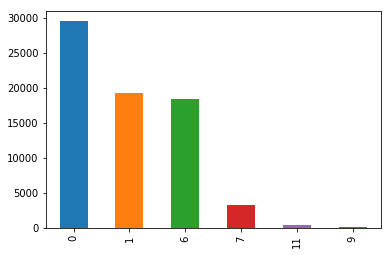

In [9]:
df.MAN_COLL.value_counts().plot(kind='bar')
df.MAN_COLL.value_counts()

In [10]:
replacements1 = {'MAN_COLL': {99 : 11 }}
df.replace(replacements1, regex=True, inplace=True)

replacements2 = {'MAN_COLL': {6 : 7 }}
df.replace(replacements2, regex=True, inplace=True)

0     29512
7     21631
1     19181
11      464
9       116
Name: MAN_COLL, dtype: int64

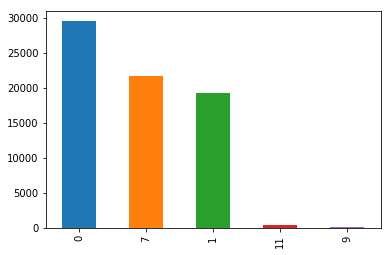

In [11]:
df.MAN_COLL.value_counts().plot(kind='bar')
df.MAN_COLL.value_counts()

4    28030
0    19427
2     8468
3     7648
1     6571
9      499
5      260
6        1
Name: INJ_SEV, dtype: int64

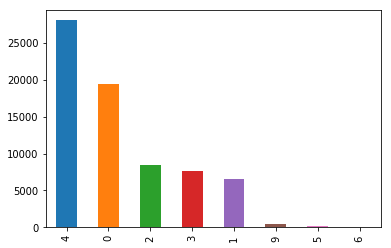

In [12]:
df.INJ_SEV.value_counts().plot(kind='bar')
df.INJ_SEV.value_counts()

In [13]:
replacements_in1 = {'INJ_SEV': { 2 : 5 }}
df.replace(replacements_in1, regex=True, inplace=True)

replacements_in2 = {'INJ_SEV': { 3 : 5 }}
df.replace(replacements_in2, regex=True, inplace=True)

replacements_in3 = {'INJ_SEV': { 1 : 5 }}
df.replace(replacements_in3, regex=True, inplace=True)

4    28030
5    22947
0    19427
9      499
6        1
Name: INJ_SEV, dtype: int64

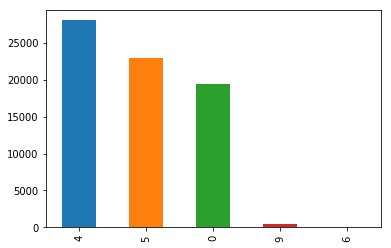

In [14]:
df.INJ_SEV.value_counts().plot(kind='bar')
df.INJ_SEV.value_counts()

In [15]:
replacements_in3 = {'INJ_SEV': { 6 : 4 }}
df.replace(replacements_in3, regex=True, inplace=True)

4    28031
5    22947
0    19427
9      499
Name: INJ_SEV, dtype: int64

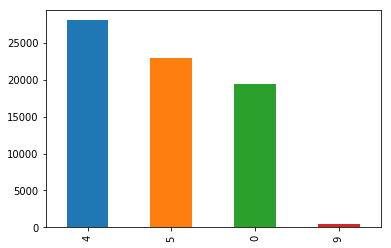

In [16]:
df.INJ_SEV.value_counts().plot(kind='bar')
df.INJ_SEV.value_counts()

In [17]:
replacements_in = {'INJ_SEV': { 4 : 1 }}
df.replace(replacements_in, regex=True, inplace=True)

replacements_in1 = {'INJ_SEV': { 5 : 2 }}
df.replace(replacements_in1, regex=True, inplace=True)

replacements_in2 = {'INJ_SEV': { 9 : 3 }}
df.replace(replacements_in2, regex=True, inplace=True)

1    28031
2    22947
0    19427
3      499
Name: INJ_SEV, dtype: int64

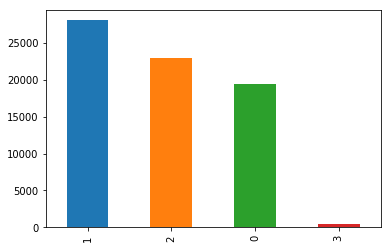

In [18]:
df.INJ_SEV.value_counts().plot(kind='bar')
df.INJ_SEV.value_counts()

8    30568
0    29872
9     6889
1     3575
Name: DRUGS, dtype: int64

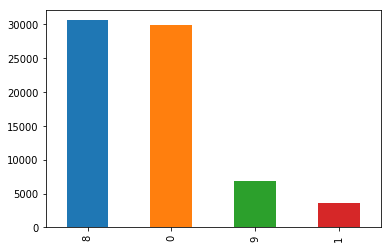

In [19]:
df.DRUGS.value_counts().plot(kind='bar')
df.DRUGS.value_counts()

In [20]:
replacements_in5 = {'DRUGS': { 9 : 8 }}
df.replace(replacements_in5, regex=True, inplace=True)

8    37457
0    29872
1     3575
Name: DRUGS, dtype: int64

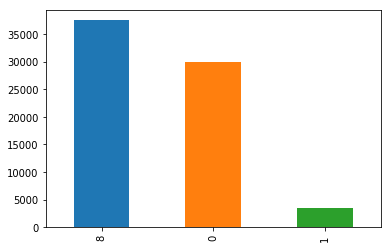

In [21]:
df.DRUGS.value_counts().plot(kind='bar')
df.DRUGS.value_counts()

1    37202
2    17618
3    12425
5     1762
4     1263
6      446
9      116
8       41
7       31
Name: LGT_COND, dtype: int64

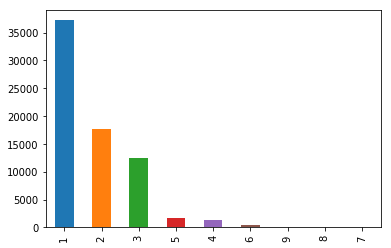

In [22]:
df.LGT_COND.value_counts().plot(kind='bar')
df.LGT_COND.value_counts()

In [23]:
replacements_in5 = {'LGT_COND': { 7 : 6 }}
df.replace(replacements_in5, regex=True, inplace=True)

replacements_in6 = {'LGT_COND': { 8 : 6 }}
df.replace(replacements_in6, regex=True, inplace=True)

replacements_in7 = {'LGT_COND': { 9 : 6 }}
df.replace(replacements_in7, regex=True, inplace=True)

1    37202
2    17618
3    12425
5     1762
4     1263
6      634
Name: LGT_COND, dtype: int64

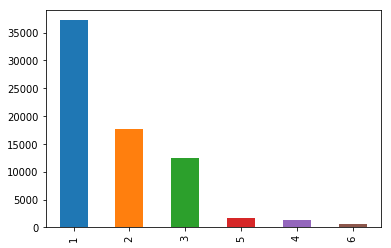

In [24]:
df.LGT_COND.value_counts().plot(kind='bar')
df.LGT_COND.value_counts()

In [25]:
Y = df['INJ_SEV']
X = df.drop('INJ_SEV', axis=1)

In [26]:
X.columns

Index(['MAN_COLL', 'AGE', 'SEX', 'REST_USE', 'ALC_RES', 'DRUGS', 'TYP_INT',
       'LGT_COND', 'FATALS', 'DRUNK_DR', 'CAR_AGE'],
      dtype='object')

In [27]:
X = X.drop('ALC_RES',axis=1)

In [28]:
X = X.drop('FATALS',axis=1)

In [29]:
X = X.drop('DRUNK_DR',axis=1)

In [30]:
import keras

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=109) # 70% training and 30% test

In [32]:
num_classes = 4
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,num_classes)

In [33]:
X_train =  preprocessing.normalize(X_train)
X_test  =  preprocessing.normalize(X_test)

In [63]:
class NeuralNetwork():
    
    
    def __init__(self):
        self.input_node    = 8
        self.Output_node   = 4
        self.hidden_node   = 7
        self.learning_rate = 0.24
        self.Momentum      = 0.15        
        
        self.W1 = np.random.normal(0.0, pow(self.input_node, -0.5),(self.input_node,self.hidden_node))
        self.W2 = np.random.normal(0.0, pow(self.hidden_node, -0.5), (self.hidden_node, self.Output_node))
        
        self.b1 = np.ones((1,self.hidden_node)) - 0.5
        self.b2 = np.ones((1,self.Output_node)) - 0.5    
                
    def sse_loss(self,y_true, y_pred):
        TS = np.sum((y_true - y_pred) **2)
        return TS
    
    def sigmoid(self,s):
        return 1/(1 + np.exp(-s))
    
    def sigmoid_derivative(self,s):
        return self.sigmoid(s) * (1 - self.sigmoid(s))

    def tanh_derivative(self, z):
        return (1 - np.power(np.tanh(z), 2))     
    
    def forward(self,X):
        self.z1 = np.dot(X,self.W1) + self.b1
        self.o1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.o1,self.W2)  + self.b2
        o2 = self.sigmoid(self.z2)     
        return o2
    
    def backpropagation(self,X,y,o):
        self.output_delta_old = 0
        self.output2_delta_old = 0
        self.output_error = y - o
        self.output_delta = self.output_error * self.sigmoid_derivative(o)
        self.output1_error = self.output_delta.dot(self.W2.T)
        self.output2_delta = self.output1_error * self.sigmoid_derivative(self.o1)
        
        self.W1 += self.Momentum * self.output_delta_old + self.learning_rate * X.T.dot(self.output2_delta)
        self.W2 += self.Momentum * self.output2_delta_old + self.learning_rate * self.o1.T.dot(self.output_delta)
        
        self.output_delta_old  = X.T.dot(self.output2_delta)
        self.output2_delta_old = self.o1.T.dot(self.output_delta)                
        
    def train(self,X,y):
        o = self.forward(X)
        self.backpropagation(X,y,o)
    
    def evaluate(self,X,y):
        pred = self.forward(X)
        loss_error = self.sse_loss(pred,y)
        acc = np.equal(np.argmax(pred, axis=1), np.argmax(y, axis=1)).mean()
        return loss_error,acc

In [35]:
NN = NeuralNetwork()
BATCH_SIZE = 100  
loss_train = []
acc_train  = []
loss_tr    = 0 
EPOCH      = 1000

In [36]:
for epochs in range(EPOCH):
        
        index = np.random.permutation(X_train.shape[0])
        batch_count = 0
        
        while batch_count* BATCH_SIZE < X_train.shape[0]:
            batch_X , batch_Y = X_train[batch_count*BATCH_SIZE:(batch_count+1)*BATCH_SIZE], y_train[batch_count*BATCH_SIZE:(batch_count+1)*BATCH_SIZE]
            batch_count += 1
            NN.train(batch_X,batch_Y)
            
        loss_tr ,accn = NN.evaluate(X_train,y_train)
        
        
        
        if epochs % 100 == 0:
            loss_train.append(loss_tr)
            y_pred_test = NN.forward(X_test)
            rounded_labels=np.argmax(y_pred_test, axis=1)
            y_test_rnd = np.argmax(y_test,axis=1)
            print("Epoch Number: %d" % epochs)
            print("loss for the epoch %.3f" % loss_tr)
            accuracy_train = metrics.accuracy_score(y_test_rnd,rounded_labels)
            print("Accuracy: %.5f\n" %accuracy_train )
            acc_train.append(accuracy_train)

Epoch Number: 0
loss for the epoch 30870.352
Accuracy: 0.49159

Epoch Number: 100
loss for the epoch 32271.195
Accuracy: 0.44481



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


Epoch Number: 200
loss for the epoch 32545.984
Accuracy: 0.43635

Epoch Number: 300
loss for the epoch 32660.540
Accuracy: 0.43376

Epoch Number: 400
loss for the epoch 32669.378
Accuracy: 0.43456

Epoch Number: 500
loss for the epoch 32666.845
Accuracy: 0.43202

Epoch Number: 600
loss for the epoch 32688.807
Accuracy: 0.43231

Epoch Number: 700
loss for the epoch 32687.417
Accuracy: 0.43259

Epoch Number: 800
loss for the epoch 32729.965
Accuracy: 0.43216

Epoch Number: 900
loss for the epoch 32684.500
Accuracy: 0.43226



In [37]:
y_pred = NN.forward(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


In [38]:
rounded_labels=np.argmax(y_pred, axis=1)
y_test_rnd = np.argmax(y_test,axis=1)

In [39]:
print(confusion_matrix(y_test_rnd,rounded_labels))

[[1126 3543 1054    0]
 [1152 6662  709    0]
 [ 957 4493 1415    0]
 [  17  129   15    0]]


In [40]:
print(classification_report(y_test_rnd,rounded_labels))

              precision    recall  f1-score   support

           0       0.35      0.20      0.25      5723
           1       0.45      0.78      0.57      8523
           2       0.44      0.21      0.28      6865
           3       0.00      0.00      0.00       161

   micro avg       0.43      0.43      0.43     21272
   macro avg       0.31      0.30      0.28     21272
weighted avg       0.42      0.43      0.39     21272



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
print("Accuracy:", metrics.accuracy_score(y_test_rnd,rounded_labels))

Accuracy: 0.43263444904099285


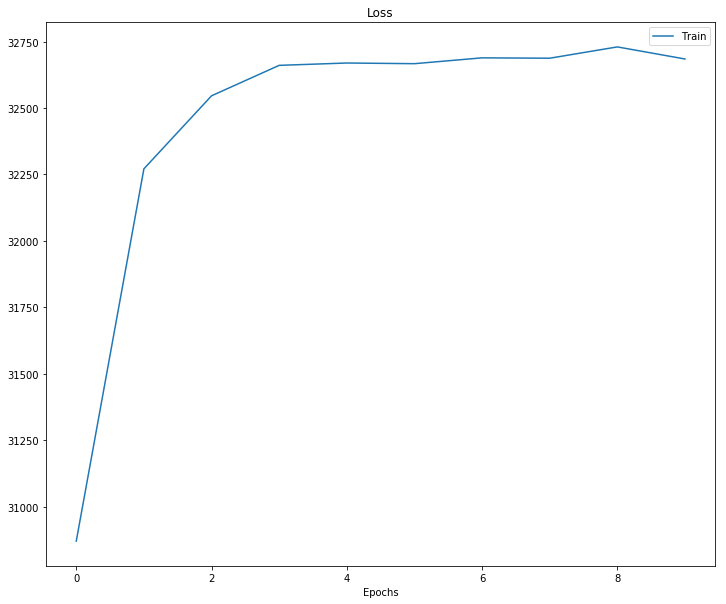

In [42]:
plt.figure(figsize=(12,10))
plt.plot(loss_train, label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.title('Loss')
plt.show()

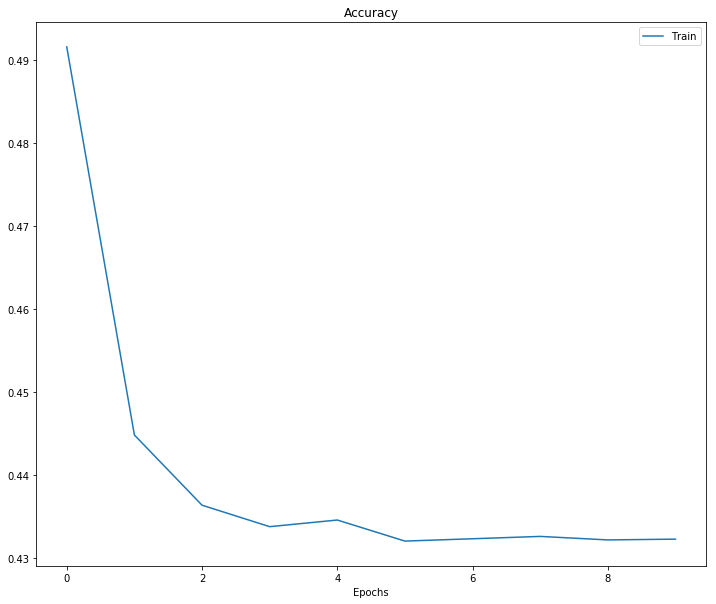

In [43]:
plt.figure(figsize=(12,10))
plt.plot(acc_train, label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.show()

In [44]:
df = df[df['INJ_SEV'] < 3]

1    28031
2    22947
0    19427
Name: INJ_SEV, dtype: int64

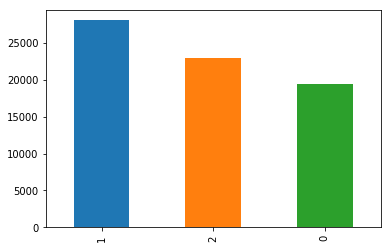

In [45]:
df.INJ_SEV.value_counts().plot(kind='bar')
df.INJ_SEV.value_counts()

In [46]:
replacements_in3 = {'INJ_SEV': { 2 : 0 }}
df.replace(replacements_in3, regex=True, inplace=True)

0    42374
1    28031
Name: INJ_SEV, dtype: int64

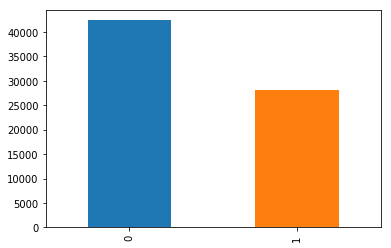

In [47]:
df.INJ_SEV.value_counts().plot(kind='bar')
df.INJ_SEV.value_counts()

In [48]:
Y = df['INJ_SEV']
X = df.drop('INJ_SEV', axis=1)

In [49]:
X = X.drop('DRUNK_DR',axis=1)

In [50]:
X = X.drop('FATALS',axis=1)

In [51]:
X = X.drop('ALC_RES',axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=109) # 70% training and 30% test

In [53]:
num_classes = 4
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,num_classes)

In [54]:
X_train =  preprocessing.normalize(X_train)
X_test  =  preprocessing.normalize(X_test)

In [64]:
for epochs in range(EPOCH):
        
        index = np.random.permutation(X_train.shape[0])
        batch_count = 0
        
        while batch_count* BATCH_SIZE < X_train.shape[0]:
            batch_X , batch_Y = X_train[batch_count*BATCH_SIZE:(batch_count+1)*BATCH_SIZE], y_train[batch_count*BATCH_SIZE:(batch_count+1)*BATCH_SIZE]
            batch_count += 1
            NN.train(batch_X,batch_Y)
            
        loss_tr ,accn = NN.evaluate(X_train,y_train)
        
        
        
        if epochs % 100 == 0:
            loss_train.append(loss_tr)
            y_pred_test = NN.forward(X_test)
            rounded_labels=np.argmax(y_pred_test, axis=1)
            y_test_rnd = np.argmax(y_test,axis=1)
            print("Epoch Number: %d" % epochs)
            print("loss for the epoch %.3f" % loss_tr)
            accuracy_train = metrics.accuracy_score(y_test_rnd,rounded_labels)
            print("Accuracy: %.5f\n" %accuracy_train )
            acc_train.append(accuracy_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


Epoch Number: 0
loss for the epoch 22032.543
Accuracy: 0.60392

Epoch Number: 100
loss for the epoch 22024.436
Accuracy: 0.60392

Epoch Number: 200
loss for the epoch 22019.480
Accuracy: 0.60392

Epoch Number: 300
loss for the epoch 22015.987
Accuracy: 0.60392

Epoch Number: 400
loss for the epoch 22013.363
Accuracy: 0.60392

Epoch Number: 500
loss for the epoch 22010.959
Accuracy: 0.60392

Epoch Number: 600
loss for the epoch 22007.237
Accuracy: 0.60392

Epoch Number: 700
loss for the epoch 22005.242
Accuracy: 0.60392

Epoch Number: 800
loss for the epoch 22002.056
Accuracy: 0.60392

Epoch Number: 900
loss for the epoch 22001.644
Accuracy: 0.60392



In [65]:
y_pred = NN.forward(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


In [66]:
rounded_labels=np.argmax(y_pred, axis=1)
y_test_rnd = np.argmax(y_test,axis=1)

In [67]:
print(classification_report(y_test_rnd,rounded_labels))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     12756
           1       0.00      0.00      0.00      8366

   micro avg       0.60      0.60      0.60     21122
   macro avg       0.30      0.50      0.38     21122
weighted avg       0.36      0.60      0.45     21122



In [68]:
print("Accuracy:", metrics.accuracy_score(y_test_rnd,rounded_labels))

Accuracy: 0.6039200833254427


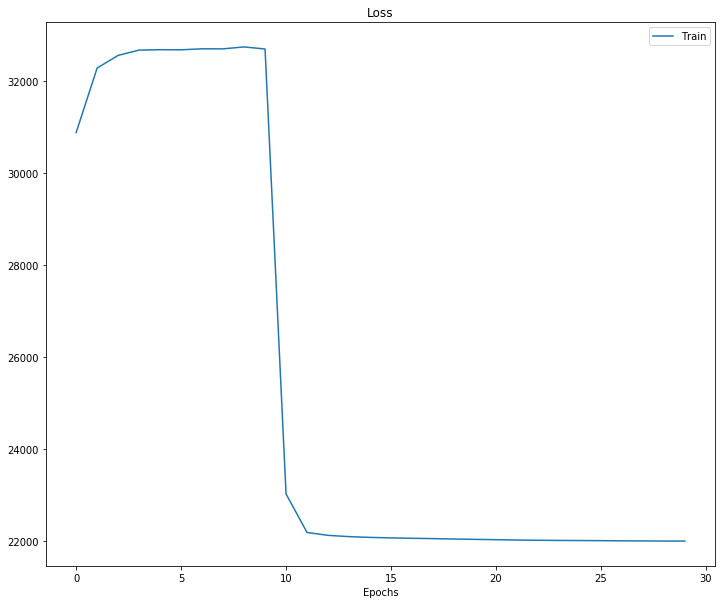

In [69]:
plt.figure(figsize=(12,10))
plt.plot(loss_train, label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.title('Loss')
plt.show()

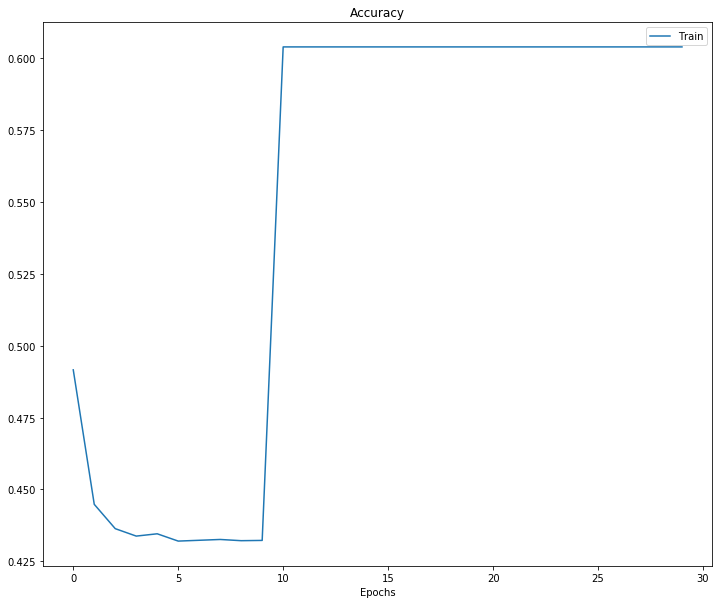

In [70]:
plt.figure(figsize=(12,10))
plt.plot(acc_train, label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.show()